# Annotation

Consider a binary classification problem. We will fit a predictor and use it to assign a weight score to each node in each instance; this operation is referred to as "annotation". For illustration purposes we will display a few annotated graphs. We will see that building a predictor on the annotated instances can increase the predictive performance.

load data and convert it to graphs

In [1]:
pos = 'bursi.pos.gspan'
neg = 'bursi.neg.gspan'

from eden.converter.graph.gspan import gspan_to_eden
iterable_pos = gspan_to_eden( pos )
iterable_neg = gspan_to_eden( neg )

#split train/test
train_test_split=0.9
from eden.util import random_bipartition_iter
iterable_pos_train, iterable_pos_test = random_bipartition_iter(iterable_pos, relative_size=train_test_split)
iterable_neg_train, iterable_neg_test = random_bipartition_iter(iterable_neg, relative_size=train_test_split)

setup the vectorizer

In [2]:
from eden.graph import Vectorizer
vectorizer = Vectorizer( complexity=2 )

In [3]:
%%time
from itertools import tee
iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train)
iterable_neg_train,iterable_neg_train_=tee(iterable_neg_train)
iterable_pos_test,iterable_pos_test_=tee(iterable_pos_test)
iterable_neg_test,iterable_neg_test_=tee(iterable_neg_test)

from eden.util import fit,estimate
estimator = fit(iterable_pos_train_, iterable_neg_train_, vectorizer)
estimate(iterable_pos_test_, iterable_neg_test_, estimator, vectorizer)

Test set
Instances: 434 ; Features: 1048577 with an avg of 83 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.80      0.84      0.82       194
          1       0.87      0.83      0.85       240

avg / total       0.84      0.84      0.84       434

APR: 0.927
ROC: 0.907
CPU times: user 12.2 s, sys: 4.09 s, total: 16.3 s
Wall time: 1min 12s


annotate instances and list all resulting graphs

display one graph as an example. Color the vertices using the annotated 'importance' attribute.

In [4]:
help(vectorizer.annotate)

Help on method annotate in module eden.graph:

annotate(self, graphs, estimator=None, reweight=1.0, relabel=False) method of eden.graph.Vectorizer instance
    Given a list of networkx graphs, and a fitted estimator, it returns a list of networkx 
    graphs where each vertex has an additional attribute with key 'importance'.
    The importance value of a vertex corresponds to the part of the score that is imputable 
    to the neighborhood of radius r+d of the vertex. 
    It can overwrite the label attribute with the sparse vector corresponding to the vertex induced features.
    
    Parameters
    ----------
    estimator : scikit-learn predictor trained on data sampled from the same distribution. 
      If None the vertex weigths are by default 1.
    
    reweight : float
      Update the 'weight' information of each vertex as a linear combination of the current weight and 
      the absolute value of the score computed by the estimator. 
      If reweight = 0 then do not update.

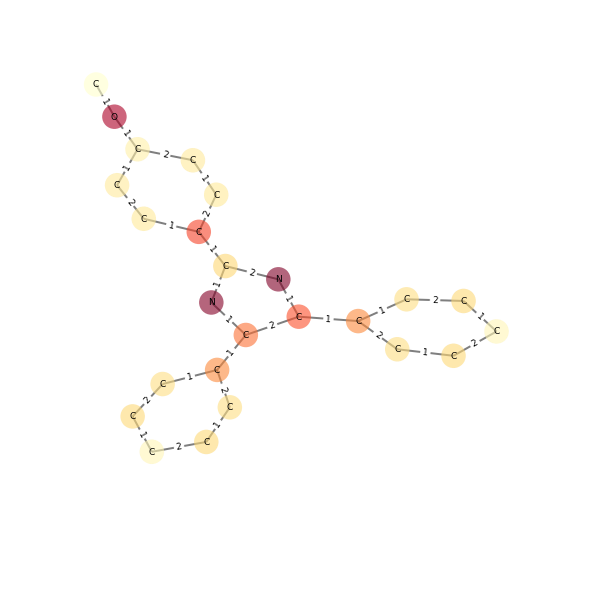

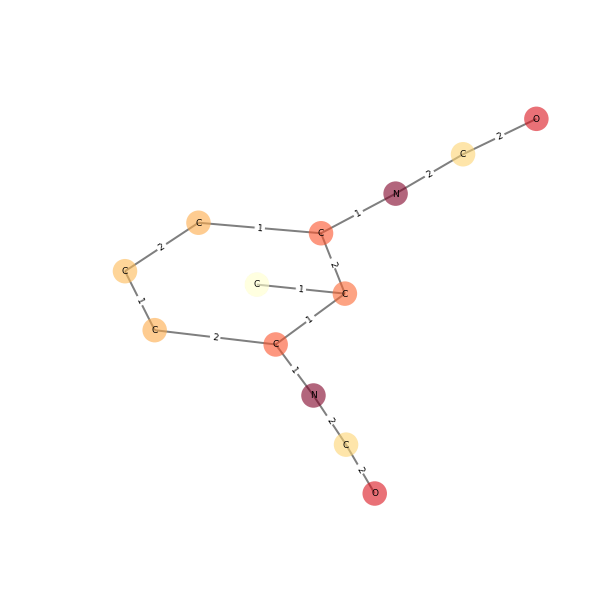

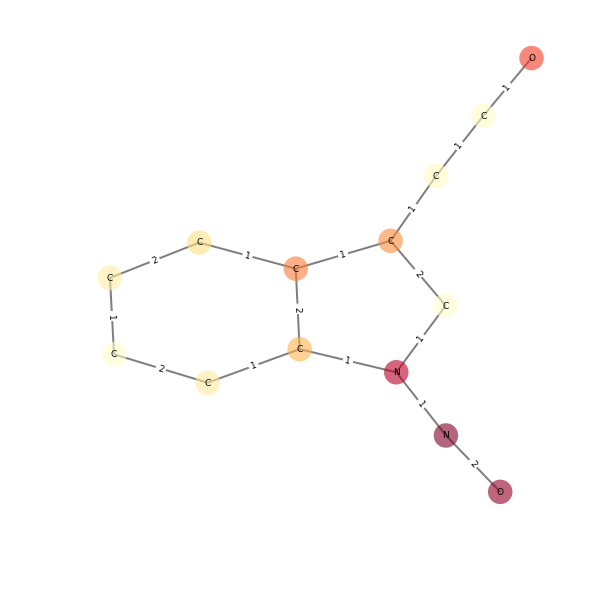

In [8]:
%matplotlib inline
from itertools import tee
iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train)

graphs = vectorizer.annotate( iterable_pos_train_, estimator=estimator )

import itertools 
graphs = itertools.islice( graphs, 3 )

from eden.util.display import draw_graph
for graph in graphs: draw_graph( graph, vertex_color='importance', size=10 )

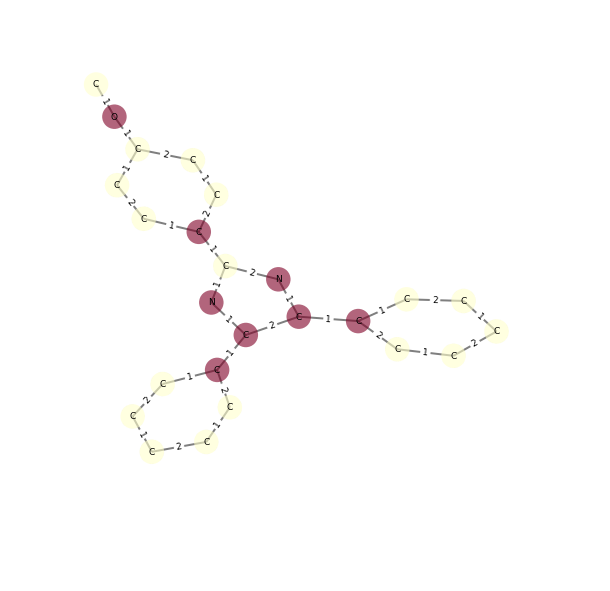

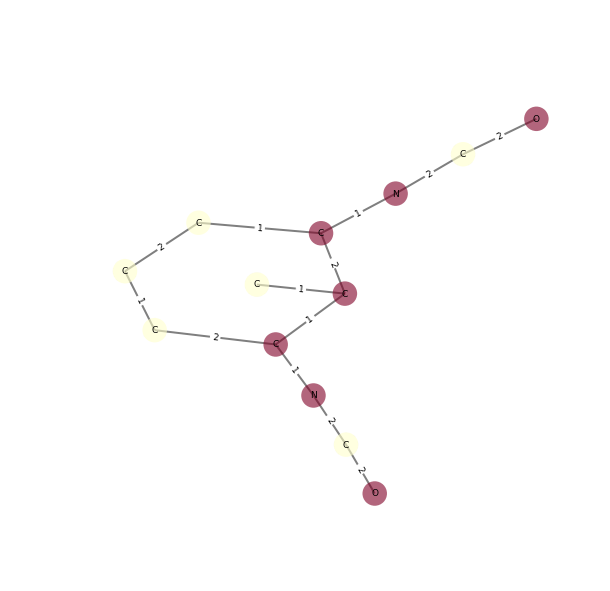

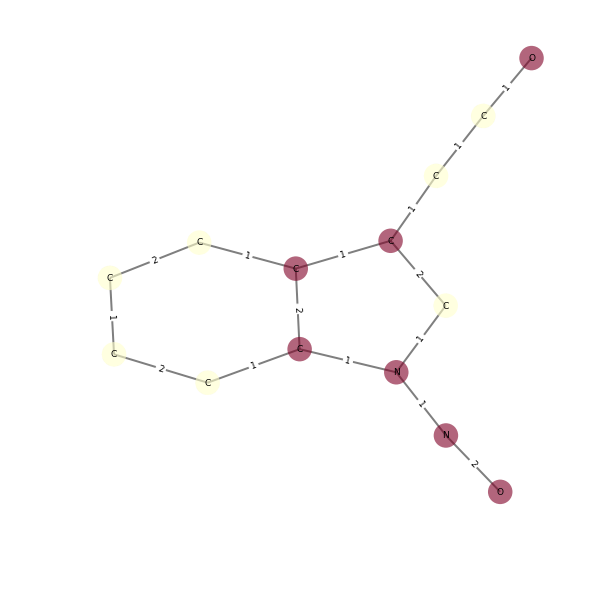

In [9]:
%matplotlib inline
from itertools import tee
iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train)

graphs = vectorizer.annotate( iterable_pos_train_, estimator=estimator )

from eden.modifier.graph.vertex_attributes import colorize_binary
graphs = colorize_binary(graph_list = graphs, output_attribute = 'color_value', input_attribute='importance', level=0)

import itertools 
graphs = itertools.islice( graphs, 3 )

from eden.util.display import draw_graph
for graph in graphs: draw_graph( graph, vertex_color='color_value', size=10 )

Create a data matrix this time using the annotated graphs. Note that now graphs are weighted. 

Evaluate the predictive performance on the weighted graphs.

In [ ]:
%%time
num_iterations = 3
reweight = 0.33
for i in range(num_iterations):
    print 'Iteration %d'%i
    
    from itertools import tee
    iterable_pos_train_=vectorizer.annotate( iterable_pos_train, estimator=estimator, reweight=reweight )
    iterable_neg_train_=vectorizer.annotate( iterable_neg_train, estimator=estimator, reweight=reweight )
    iterable_pos_test_=vectorizer.annotate( iterable_pos_test, estimator=estimator, reweight=reweight )
    iterable_neg_test_=vectorizer.annotate( iterable_neg_test, estimator=estimator, reweight=reweight )
    
    iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train_)
    iterable_neg_train,iterable_neg_train_=tee(iterable_neg_train_)
    iterable_pos_test,iterable_pos_test_=tee(iterable_pos_test_)
    iterable_neg_test,iterable_neg_test_=tee(iterable_neg_test_)

    from eden.util import fit,estimate
    estimator = fit(iterable_pos_train_, iterable_neg_train_, vectorizer)
    estimate(iterable_pos_test_, iterable_neg_test_, estimator, vectorizer)